# Diamond Price Prediction 

### Feature description:

Before jumping into building the model, let's have a look into the variables & their definitions:

- **Price** : is in US dollars


- **Carat** : weight of the diamond 


- **Cut** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)


- **color** : diamond colour, from J (worst) to D (best)


- **clarity** : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


- **x** : length in mm 


- **y** : width in mm 


- **z** : depth in mm


- **depth**  : The height of a diamond


- **table**  : The width of the diamond's table expressed as a percentage of its average diameter


### Let's get started to build the linear regression model based on the following steps

### Table of Contents

* [Importing the Libraries](#chapter1)

* [Loading the dataset](#chapter2)

* [Data Preprocessing](#chapter3)

* [Preparing the Data for Training](#chapter4)

* [Model Building](#chapter5)

### Step 1: Import the required libraries. <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Step 2 : Load the dataset <a class="anchor" id="chapter2"></a>

To load the dataset, we will be using `pd.read_csv()`function and it will convert the dataset to a dataframe and have a look into the top 5 rows of dataset using `pd.head()` function

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

In [2]:
data = pd.read_csv("D:\Datasets\diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Step 3: Data Preprocessing <a class="anchor" id="chapter3"></a>

Steps involved in Data Preprocessing

1. Data cleaning
2. Identifying and removing outliers
3. Encoding categorical variables

Look at the concise summary of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There is no null data in the dataset. The given dataset has 7 numeric columns and three non-numric (categorical) columns

Get the descriptive statistics of the dataset using pd.describe()


The first column seems to be just index so we will drop it.

In [4]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Points to notice:

Min value of "x", "y", "z" are zero. This indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as they are clearly faulty data points.


In [5]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

In [6]:
#Just to confirm that there won't be any zero values rows
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


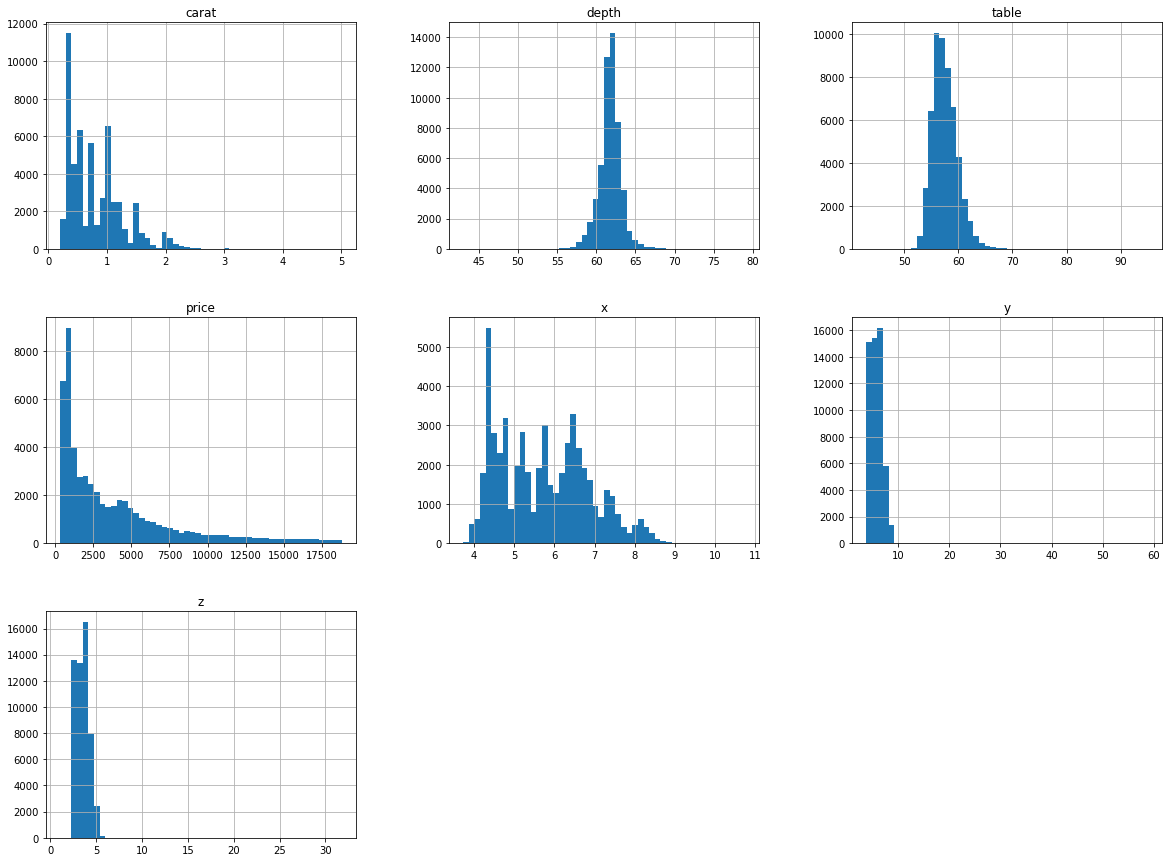

In [7]:
# Visualizing the data
data.hist(bins=50,figsize=(20,15))
plt.show()

Lets look at the pair plot of the dataset. Pair plot allows us to see both the distribution of variables and also the relationships between two variables 

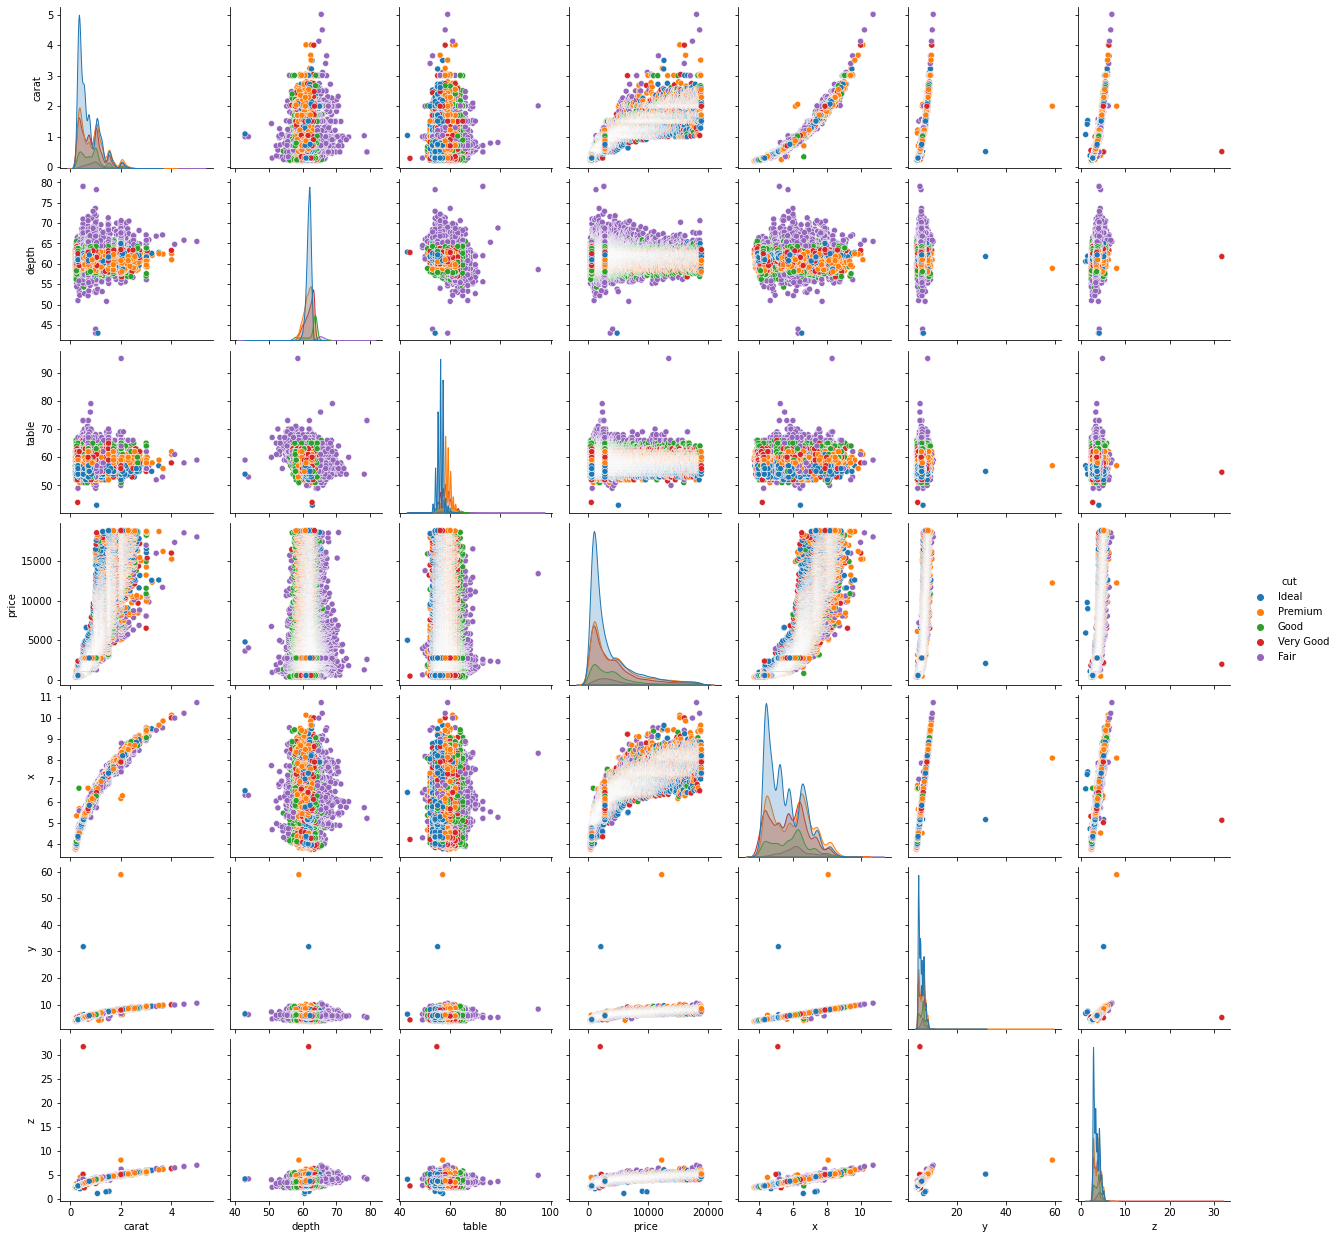

In [8]:
ax = sns.pairplot(data, hue= "cut")

#### A few points to notice in these pair plots:

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model. These points are referred to as "Outliers".

1. "y" and "z" have some dimensional outliers in our dataset that needs to be eliminated.
2. The "depth" should be capped but we must examine the regression line to be sure.
3. The "table" feature should be capped too.
4. Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

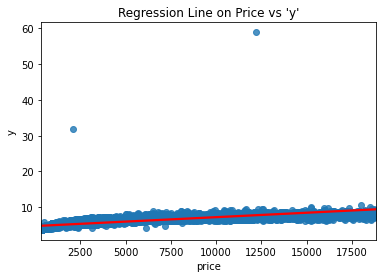

In [9]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

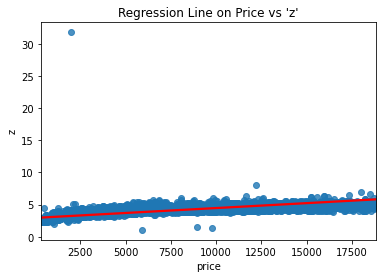

In [10]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

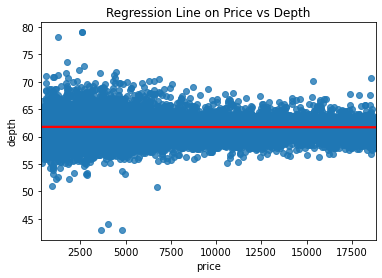

In [11]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Depth")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

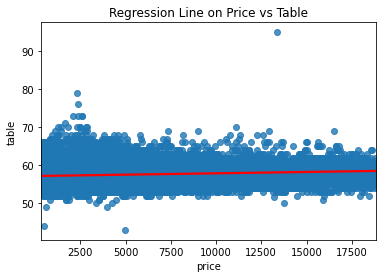

In [12]:
ax= sns.regplot(x="price", y="table", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Table")

We can clearly spot outliers in these attributes. Next up, we will remove these data points. 

In [13]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

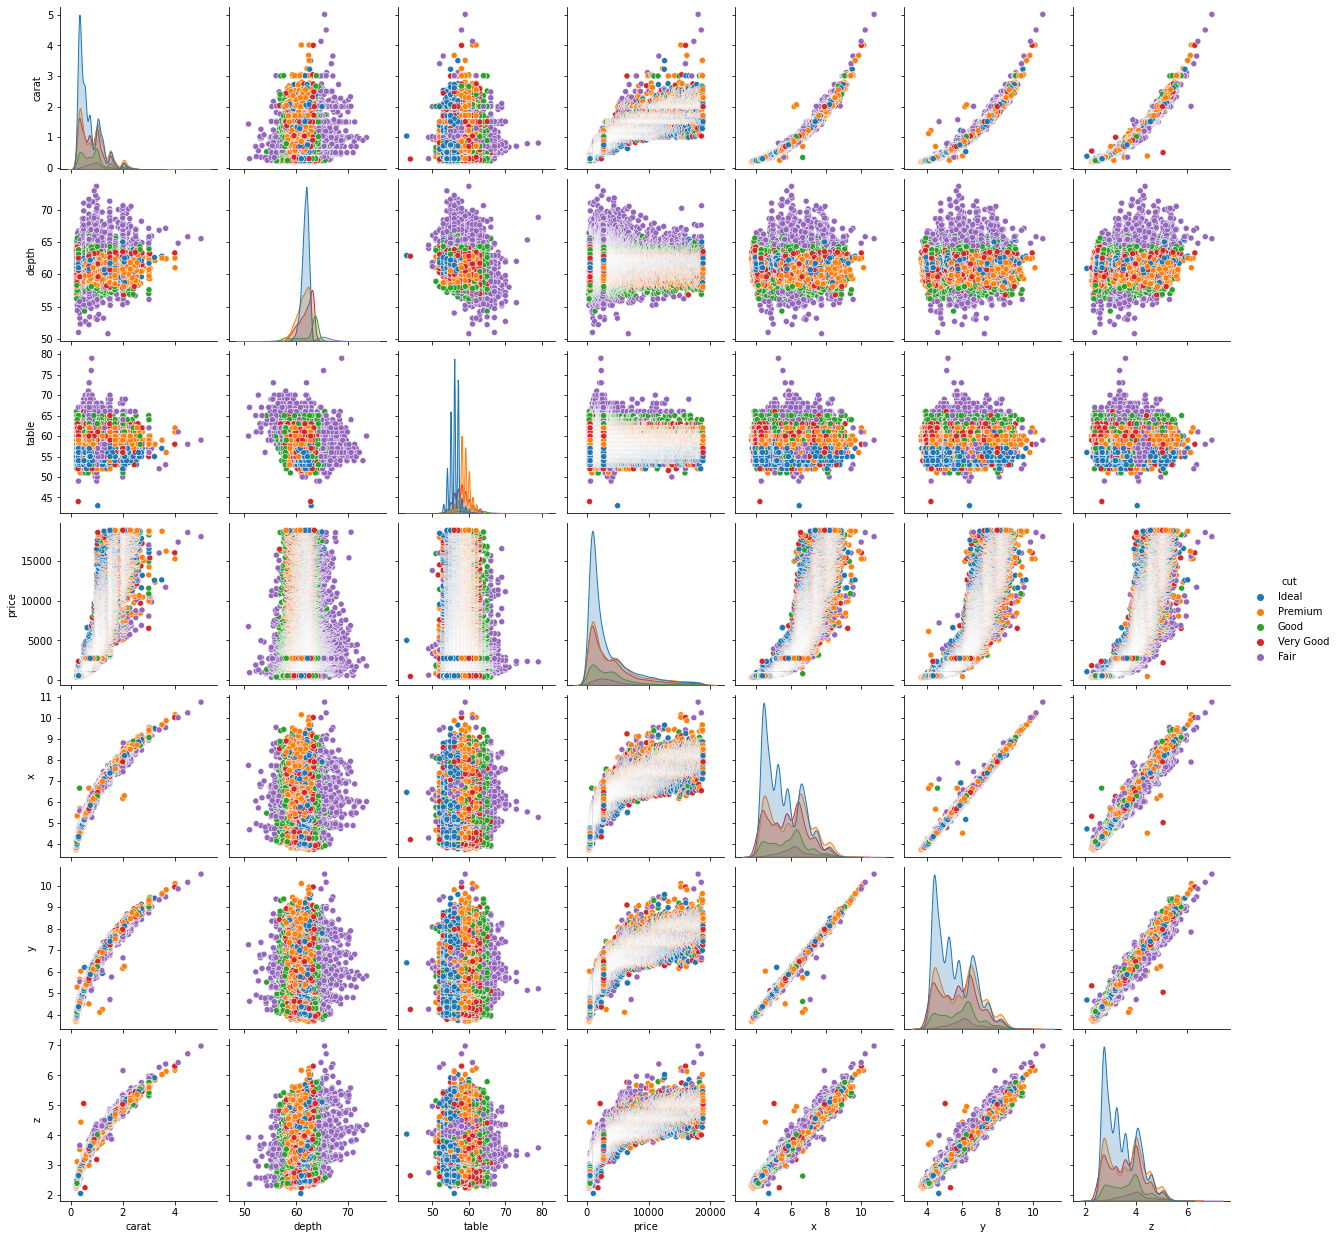

In [14]:
ax=sns.pairplot(data, hue= "cut")



That's a much cleaner dataset. Next, we will deal with the categorical variables.


In [15]:
# Getting list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']




We have three categorical variables. Let us have a look at them.


Text(0.5, 0, 'Cut')

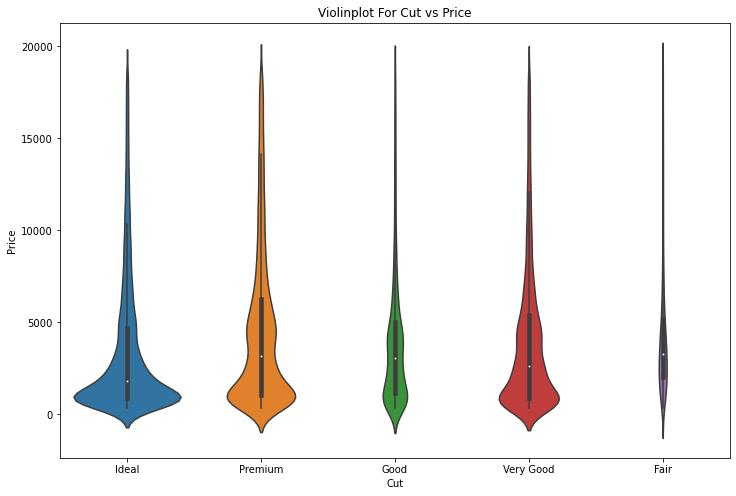

In [16]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Cut vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

Text(0.5, 0, 'Color')

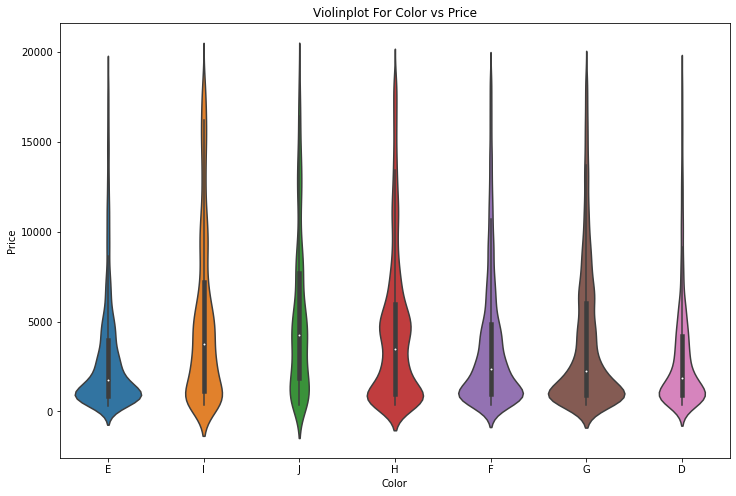

In [17]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Color vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")

Text(0.5, 0, 'Clarity')

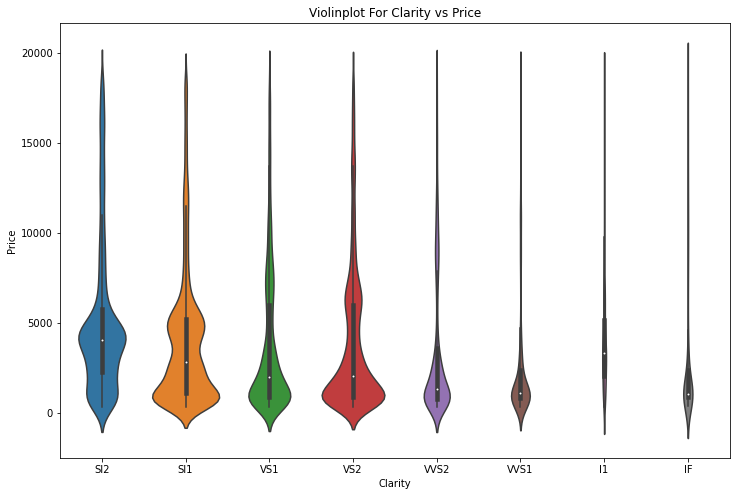

In [18]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Clarity vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")

Now we will perform Label encoding on the data to get rid of object datatype.


In [19]:
# Making copy to avoid changing original data 
label_data = data.copy()

# Applying label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

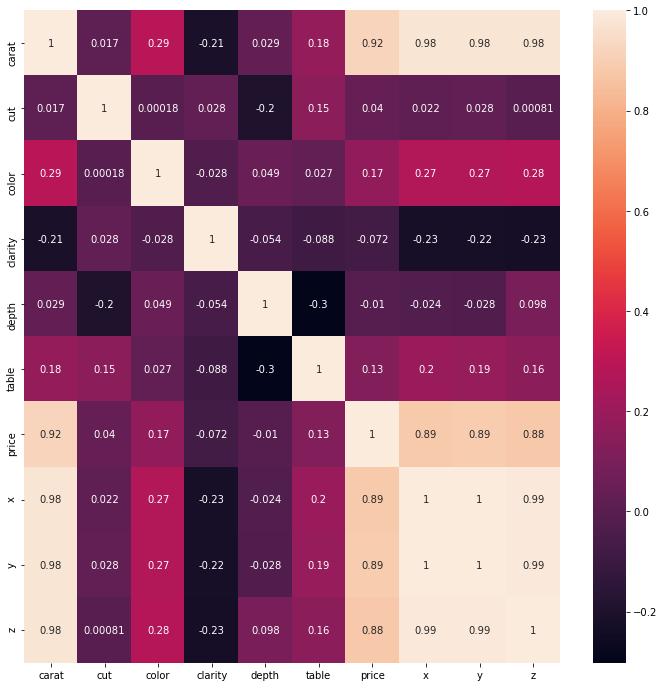

In [20]:
#plotting correlation matrix
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,annot=True)

### Points to notice:

1. "x", "y" and "z" show a high correlation to the target column.
2. "depth", "cut" and "table" show low correlation.

## Step 4: Prepare the dataset for training <a class="anchor" id="chapter4"></a>

#### Steps involved

1. Setting up features and target
2. Splitting the data into training set and testing set

In [21]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]

In [22]:
#Splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [23]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Building <a class="anchor" id="chapter5"></a>

#### Steps involved in Model Building

1. Fit all the models with the training data
2. Checiking the rmse of all the model
3. Fit the best model on the training set and get the output


### 1. Linear Regression

In [24]:
# Building the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Training accuracy: ", lin_reg.score(X_train, y_train))
print("Testing accuracy: ", lin_reg.score(X_test, y_test))

Training accuracy:  0.886288619253774
Testing accuracy:  0.8890105065854332


In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

1319.5391876733745


### 2. KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor
Regressor = KNeighborsRegressor(n_neighbors=7)
Regressor.fit(X_train,y_train)
knn_pred = Regressor.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
print(rmse)

804.7628638784524


### 3. Decision Tree

In [28]:
#Importing the decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)
y_pred1 = dtr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

740.718655499229


### 4. Random Forest

In [30]:
#importing the random forest alogrithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=7, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=7, random_state=42)

In [31]:
y_pred2 = rfr.predict(X_test)
print(y_pred2)

[5880.57142857 2682.85714286 4217.71428571 ...  883.28571429 1156.42857143
 7039.28571429]


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print(rmse)

581.712006593487


#### Testing the Model with the best score on the test set

In the above scores, RandomForestRegressoer appears to be the model with the best scoring on root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R2_score = ',r2)

Mean Absolute Error =  289.43284573011516
Mean Squared Error =  338388.858615021
Root Mean Squared Error =  581.712006593487
R2_score =  0.9784298413261906


We are getting a R2_score of approximately "0.98" which is very good. This means that our model is 98% accurate in predicting the price of a diamond.